# File Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from datetime import datetime
import rpy2
import os
os.environ['R_HOME'] = '/lib/R'
%load_ext rpy2.ipython

from preprocessing_all_points import *
from preprocessing_points_spatially_temporally import *
from compile_model_t import *

# Load the data

In [3]:
# Import and preprocess data
df_lagoon_profiles,df_ocean_profiles,inundation_dict,winds_dict,waves_dict,tide_dict,sla_dict,time_dict = \
    loading_tarawa_data()

In [4]:
df_ocean,df_lagoon = preprocessing_points_spatially()
df_lagoon,lagoon_data_dict = BN_Antonio_preprocessing_lagoon(df_lagoon)
df_ocean,ocean_data_dict = BN_Antonio_preprocessing_ocean(df_ocean)

# Testing Code

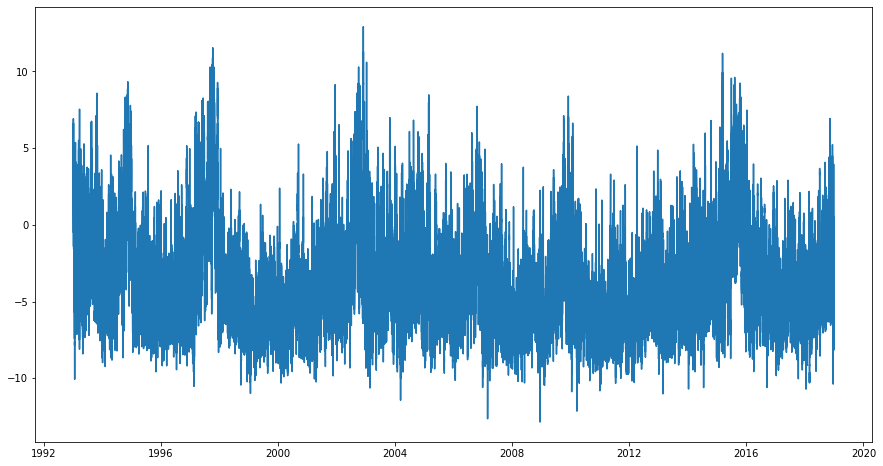

In [5]:
plt.figure(figsize=(15,8))
plt.plot(time_dict['time'],winds_dict['wind_u'])

In [6]:
from sklearn.cluster import KMeans

In [7]:
df_winds = pd.DataFrame.from_dict({**winds_dict},orient='index').T
test = df_winds.to_numpy()
km = KMeans(n_clusters=4).fit(test)

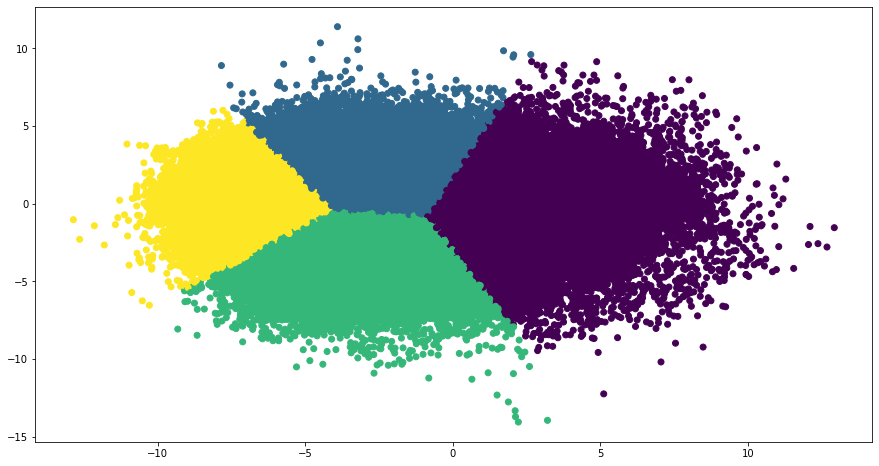

In [8]:
fig = plt.figure(figsize=(15,8))

plt.scatter(df_winds['wind_u'],df_winds['wind_v'],c=km.labels_)

plt.show()

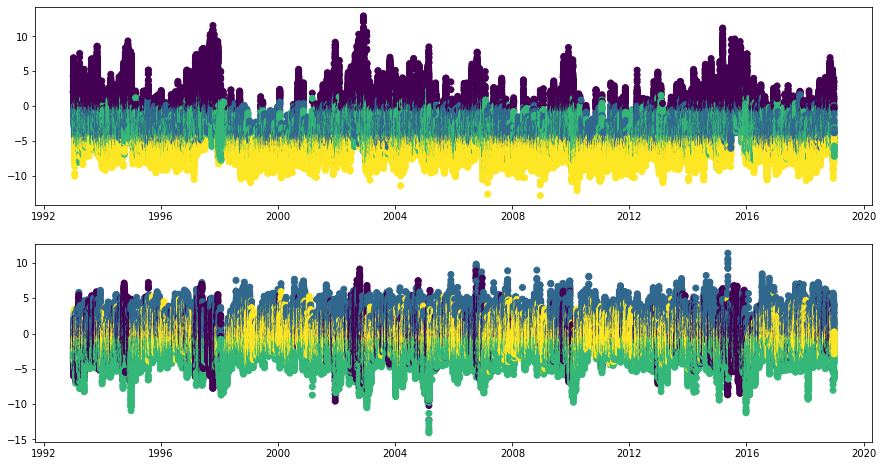

In [9]:
fig = plt.figure(figsize=(15,8))

ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))

ax1.scatter(time_dict['time'],df_winds['wind_u'],c=km.labels_)
ax2.scatter(time_dict['time'],df_winds['wind_v'],c=km.labels_)

plt.show()

In [10]:
df_all_data = pd.DataFrame.from_dict({**winds_dict,**waves_dict},orient='index').T

/tmp/ipykernel_42/3633982892.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ocean_wind_wave[col] = (max_col-df_ocean_wind_wave[col])/(max_col-min_col)
/tmp/ipykernel_42/3633982892.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ocean_wind_wave['clusters'] = km.labels_
/tmp/ipykernel_42/3633982892.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

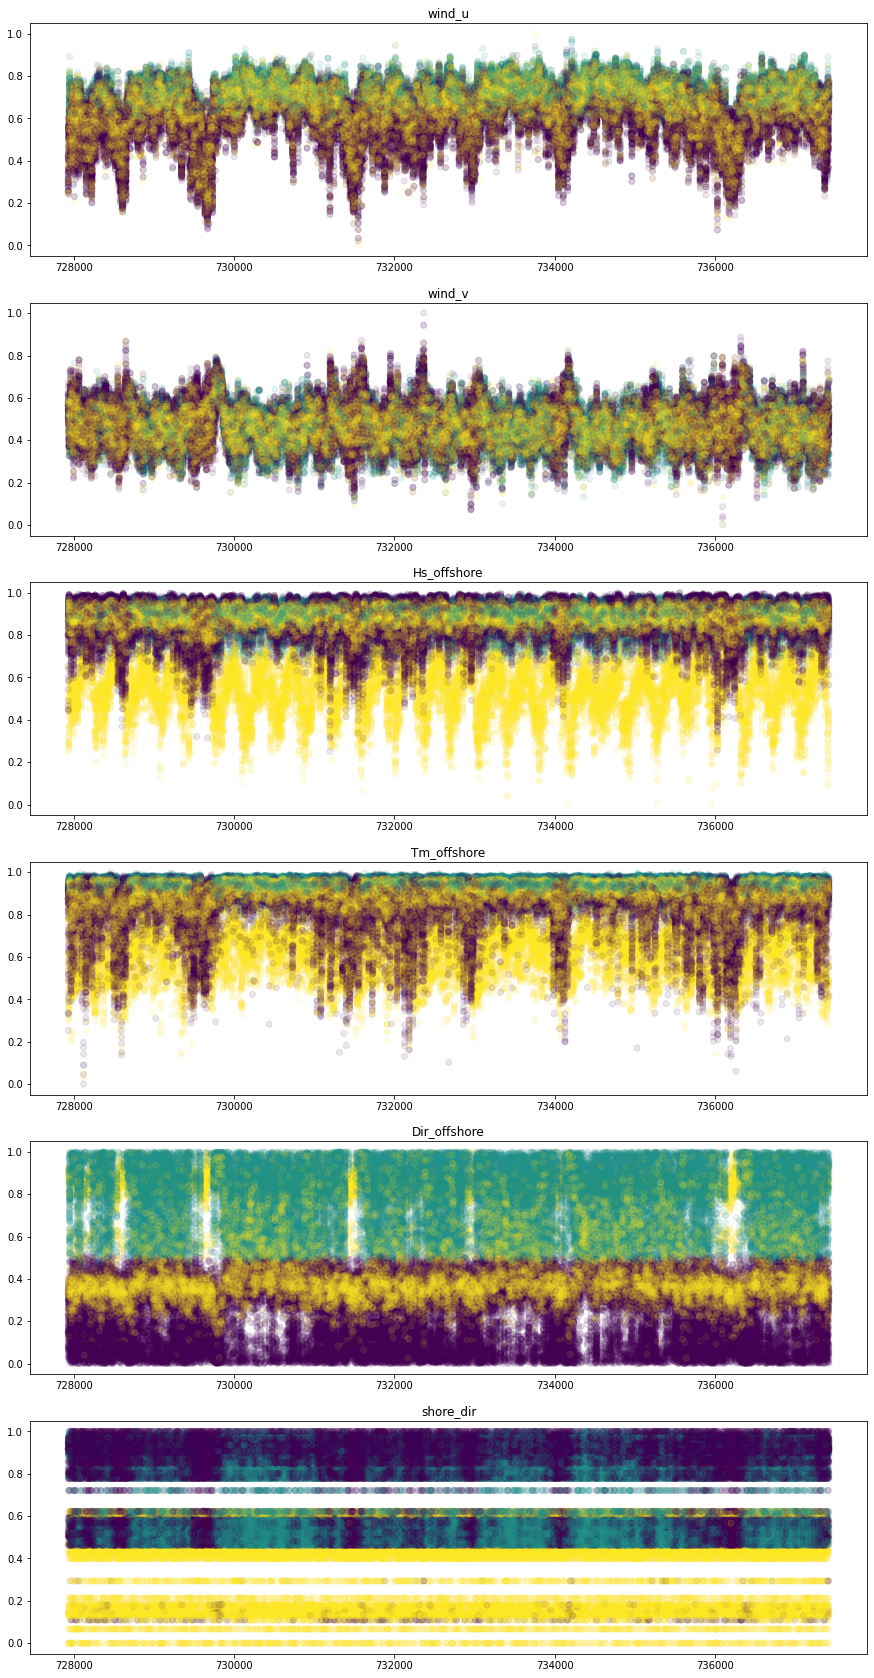

In [11]:
df_ocean_wind_wave = df_ocean[['wind_u','wind_v','Hs_offshore','Tm_offshore','Dir_offshore','shore_dir']]

for col in list(df_ocean_wind_wave):
    max_col = np.max(df_ocean_wind_wave[col])
    min_col = np.min(df_ocean_wind_wave[col])
    df_ocean_wind_wave[col] = (max_col-df_ocean_wind_wave[col])/(max_col-min_col)

test = df_ocean_wind_wave.to_numpy()
km = KMeans(n_clusters=3).fit(test)

fig = plt.figure(figsize=(15,30))

ax1 = plt.subplot2grid((6,1),(0,0))
ax2 = plt.subplot2grid((6,1),(1,0))
ax3 = plt.subplot2grid((6,1),(2,0))
ax4 = plt.subplot2grid((6,1),(3,0))
ax5 = plt.subplot2grid((6,1),(4,0))
ax6 = plt.subplot2grid((6,1),(5,0))

for ax,var in zip([ax1,ax2,ax3,ax4,ax5,ax6],list(df_ocean_wind_wave)):
    ax.scatter(df_ocean.time,df_ocean_wind_wave[var],c=km.labels_,alpha=0.1)
    ax.set_title(var)
    
df_ocean_wind_wave['clusters'] = km.labels_
df_ocean_wind_wave['time'] = df_ocean.time
df_ocean_wind_wave['time'] = [(datetime.fromordinal(int(time)-366)+timedelta(days=time%1)) for time in df_ocean['time']]
df_ocean_wind_wave = df_ocean_wind_wave.sort_values('time')

In [12]:
df_day = df_ocean_wind_wave[(df_ocean_wind_wave.time>=datetime(1993,1,1,0,0,0))&(df_ocean_wind_wave.time<datetime(1993,1,2,0,0,0))]

In [13]:
# for index,group in df_day.groupby('clusters'):
#     !R -i df_day
#     !R summary(df_day)



ARGUMENT 'df_day' __ignored__


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> 
> 
> /usr/bin/sh: 1: Syntax error: "(" unexpected

ARGUMENT 'df_day' __ignored__


R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
Copyright (C) 2020 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute 

KeyboardInterrupt: 

In [ ]:
# %%R -i df_ocean_wind_wave

# summary(df_ocean_wind_wave)

# Find "King tide" events

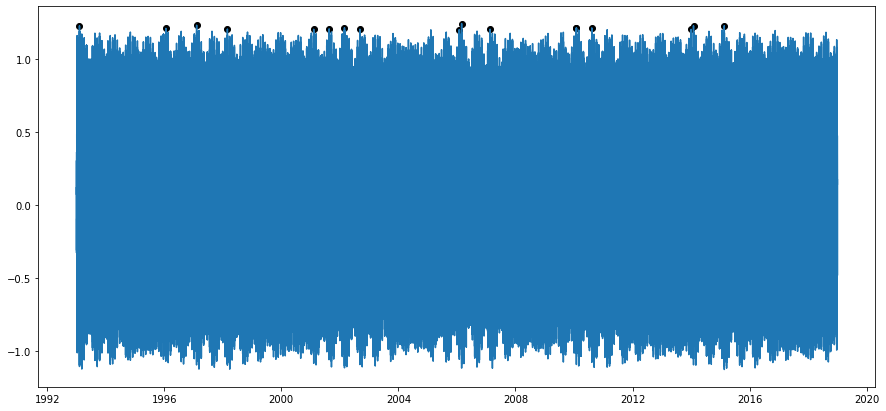

In [26]:
fig = plt.figure(figsize=(15,7))

ax1 = plt.subplot2grid((1,1),(0,0))

ax1.plot(time_dict['time'],tide_dict['Tide'])

ax1.scatter(np.array(time_dict['time'])[tide_dict['Tide']>1.2],tide_dict['Tide'][tide_dict['Tide']>1.2],c='k')

plt.show()

# Large Wave Periods

In [101]:
# First, group the shorelines into faceing different directions

In [107]:
lats = [x[0] for x in inundation_dict['Ptos']]
longs = [x[1] for x in inundation_dict['Ptos']]


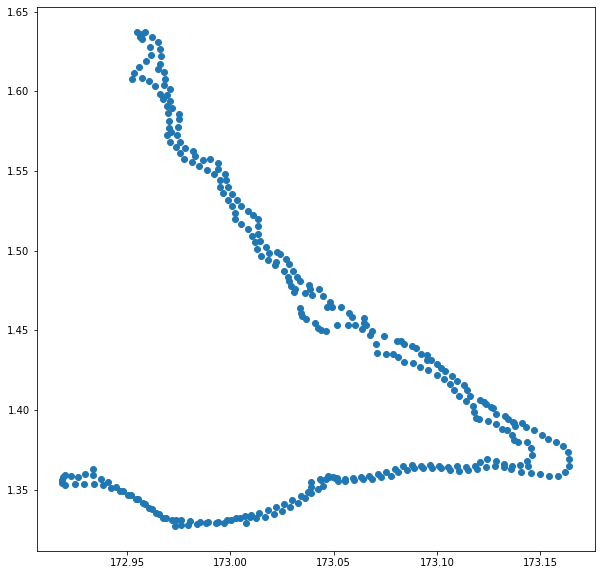

In [108]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((1,1),(0,0))

ax1.scatter(lats,longs)

plt.show()


In [114]:
df_ocean_coords = df_ocean[['lat','long','shore_dir']]
df_ocean_coords = df_ocean_coords.drop_duplicates()

df_ocean_coords

,lat,long,shore_dir
0,1.359241,172.92001,319.061643
1000,1.356421,172.91848,272.206588
2000,1.353139,172.92019,188.726378
3000,1.353647,172.92488,181.362270
4000,1.353986,172.92935,177.157178
...,...,...,...
170932,1.357814,172.91907,298.809736
171932,1.354158,172.91862,246.268673
172932,1.636152,172.95727,340.506556
173932,1.356990,173.04626,158.526428


In [109]:
# For an example point, have a look at how the wave height, period and direction have changed

In [71]:
wave_period = waves_dict['Tmo'][:,0]
wave_height = waves_dict['Hso'][:,0]
wave_time = np.array(waves_dict['Timeo'])


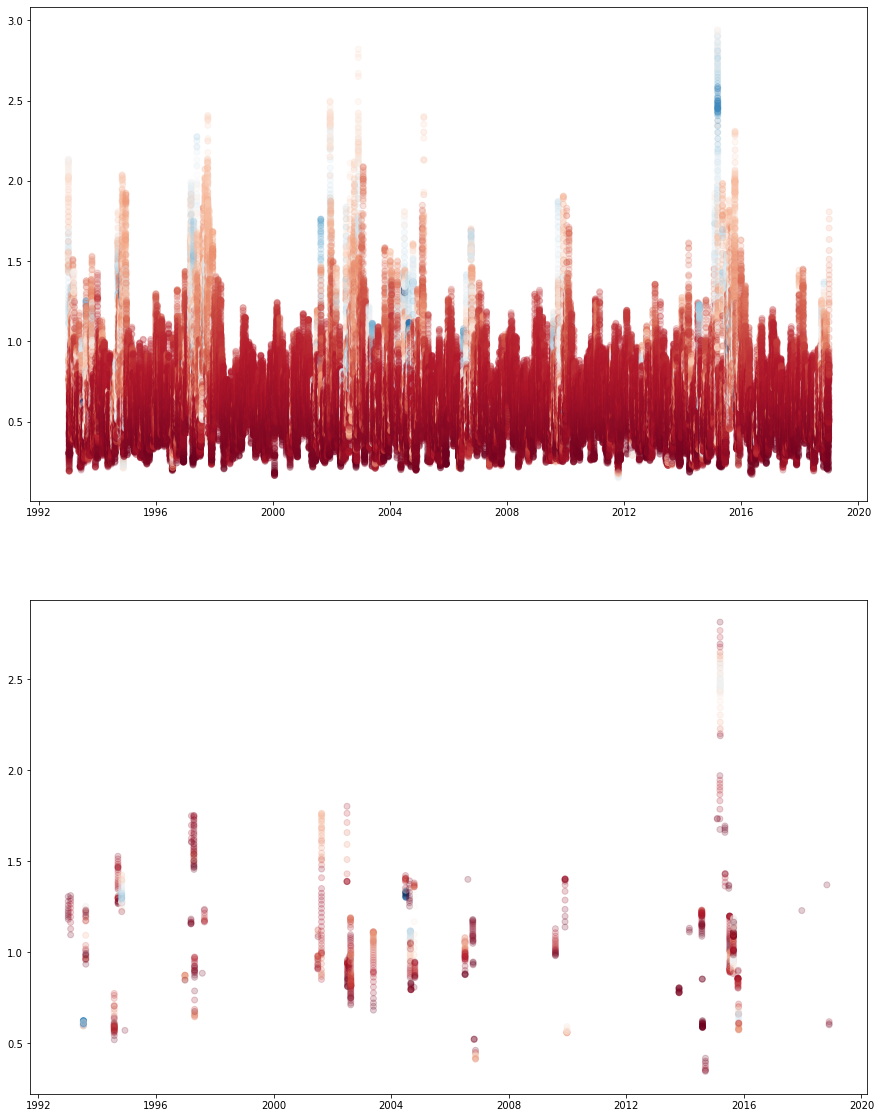

In [72]:
fig = plt.figure(figsize=(15,20))

ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))

ax1.scatter(wave_time,wave_height,c=wave_period,alpha=0.2,cmap='RdBu')

max_wave_period = 8
storm_wave_period = wave_period[wave_period>max_wave_period]
storm_wave_height = wave_height[wave_period>max_wave_period]
storm_time = wave_time[wave_period>max_wave_period]


ax2.scatter(storm_time,storm_wave_height,c=storm_wave_period,alpha=0.2,cmap='RdBu')

plt.show()

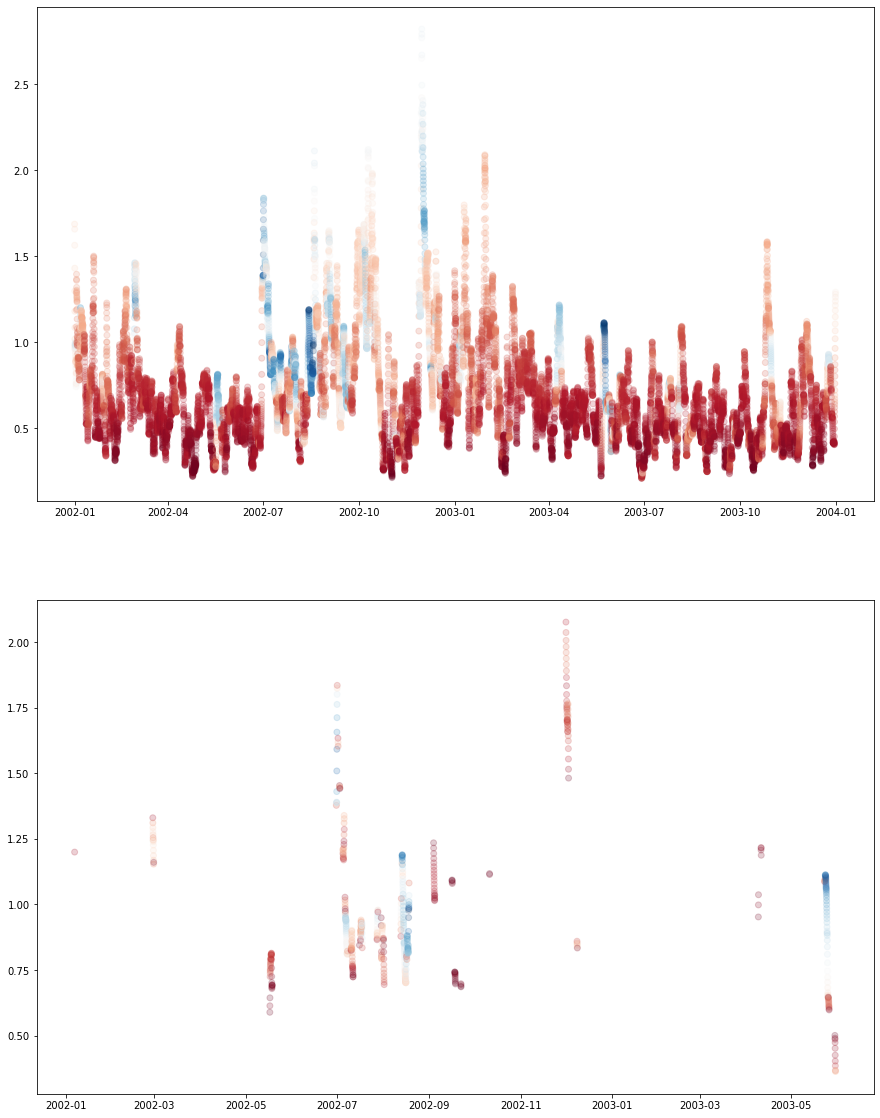

In [99]:
start_year = 2002
end_year = 2004

wave_time_slice = np.array([time for time in wave_time if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])
wave_height_slice = np.array([height for height,time in zip(wave_height,wave_time)\
                     if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])
wave_period_slice = np.array([period for period,time in zip(wave_period,wave_time)\
                     if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])

fig = plt.figure(figsize=(15,20))

ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))

ax1.scatter(wave_time_slice,wave_height_slice,c=wave_period_slice,alpha=0.2,cmap='RdBu')

max_wave_period = 7
storm_wave_period = wave_period_slice[wave_period_slice>max_wave_period]
storm_wave_height = wave_height_slice[wave_period_slice>max_wave_period]
storm_time = wave_time_slice[wave_period_slice>max_wave_period]


ax2.scatter(storm_time,storm_wave_height,c=storm_wave_period,alpha=0.2,cmap='RdBu')

plt.show()

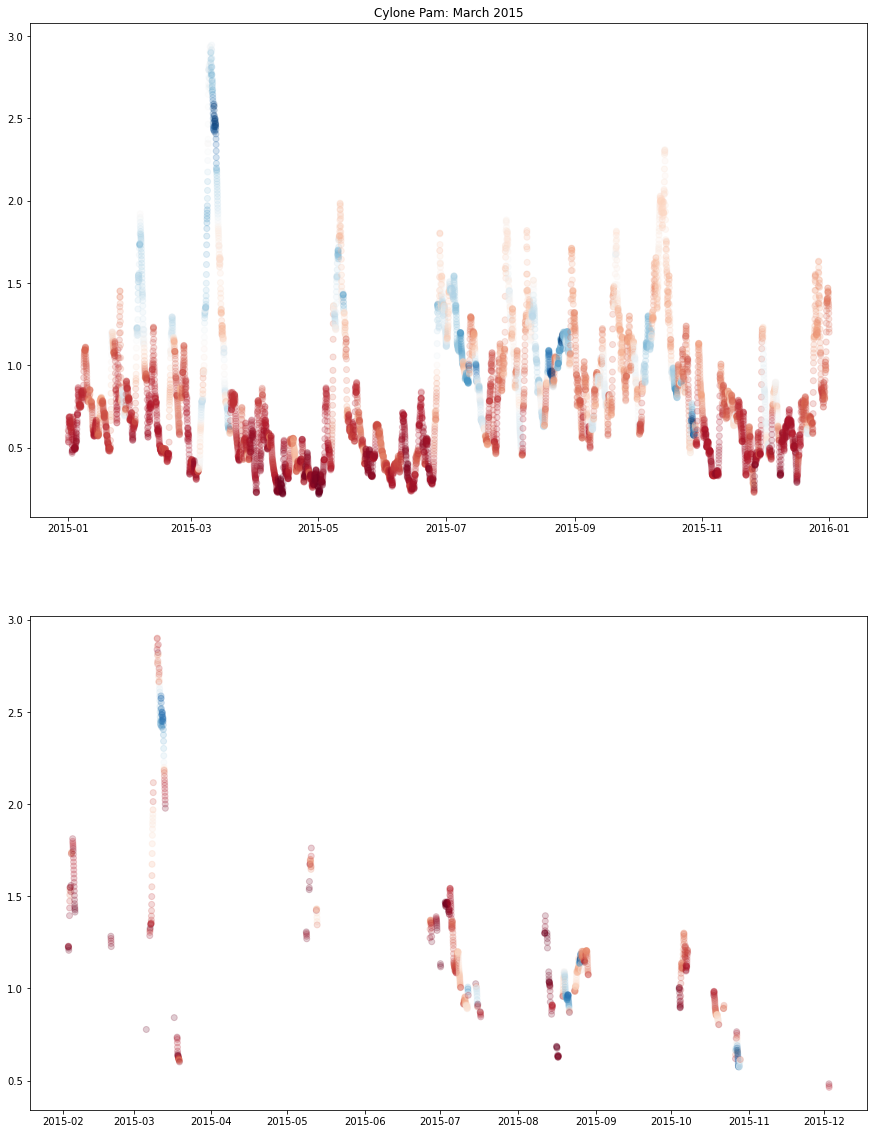

In [100]:
start_year = 2015
end_year = 2016

wave_time_slice = np.array([time for time in wave_time if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])
wave_height_slice = np.array([height for height,time in zip(wave_height,wave_time)\
                     if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])
wave_period_slice = np.array([period for period,time in zip(wave_period,wave_time)\
                     if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])

fig = plt.figure(figsize=(15,20))

ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))

ax1.scatter(wave_time_slice,wave_height_slice,c=wave_period_slice,alpha=0.2,cmap='RdBu')

max_wave_period = 7
storm_wave_period = wave_period_slice[wave_period_slice>max_wave_period]
storm_wave_height = wave_height_slice[wave_period_slice>max_wave_period]
storm_time = wave_time_slice[wave_period_slice>max_wave_period]


ax2.scatter(storm_time,storm_wave_height,c=storm_wave_period,alpha=0.2,cmap='RdBu')

ax1.set_title('Cylone Pam: March 2015')

plt.show()

# Cyclones
- March 2015; cyclone Pam (6-20th)
- 



In [62]:
fig = plt.figure(figsize=(15,20))

ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))

ax1.scatter(time_dict['time'],waves_dict['Hso'][:,0],c=waves_dict['Tmo'][:,0],alpha=0.2,cmap='RdBu')

max_wave_period = 8
storm_wave_period = waves_dict['Tmo'][:,0][waves_dict['Tmo'][:,0]>max_wave_period]
storm_wave_height = waves_dict['Hso'][:,0][waves_dict['Tmo'][:,0]>max_wave_period]
storm_time = np.array(waves_dict['Timeo'])[waves_dict['Tmo'][:,0]>max_wave_period]


ax2.scatter(storm_time,storm_wave_height,c=storm_wave_period,alpha=0.5)

plt.show()

array([datetime.datetime(1993, 1, 1, 0, 0),
       datetime.datetime(1993, 1, 1, 0, 59, 59, 999997),
       datetime.datetime(1993, 1, 1, 2, 0, 0, 3), ...,
       datetime.datetime(2018, 11, 26, 20, 0, 0, 3),
       datetime.datetime(2018, 11, 26, 21, 0),
       datetime.datetime(2018, 11, 26, 21, 59, 59, 999997)], dtype=object)

In [61]:
waves_dict['Timeo']

[datetime.datetime(1993, 1, 1, 0, 0),
 datetime.datetime(1993, 1, 1, 0, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 2, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 3, 0),
 datetime.datetime(1993, 1, 1, 3, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 5, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 6, 0),
 datetime.datetime(1993, 1, 1, 6, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 8, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 9, 0),
 datetime.datetime(1993, 1, 1, 9, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 11, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 12, 0),
 datetime.datetime(1993, 1, 1, 12, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 14, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 15, 0),
 datetime.datetime(1993, 1, 1, 15, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 17, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 18, 0),
 datetime.datetime(1993, 1, 1, 18, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 20, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 21, 0),
 datetime.datetime(1

array([1.22656677, 1.20895256, 1.23063553, 1.2045477 , 1.20288126,
       1.20560288, 1.21349506, 1.20343218, 1.20055588, 1.24178494,
       1.20341142, 1.21304665, 1.21070459, 1.21197647, 1.20252206,
       1.22661574, 1.22757784])

array([datetime.datetime(1993, 2, 7, 5, 0, 0, 3),
       datetime.datetime(1996, 1, 21, 5, 0, 0, 3),
       datetime.datetime(1997, 2, 8, 5, 0, 0, 3),
       datetime.datetime(1998, 2, 27, 5, 0, 0, 3),
       datetime.datetime(2001, 2, 8, 5, 0, 0, 3),
       datetime.datetime(2001, 8, 19, 17, 0, 0, 3),
       datetime.datetime(2002, 2, 27, 5, 0, 0, 3),
       datetime.datetime(2002, 9, 7, 17, 0, 0, 3),
       datetime.datetime(2006, 1, 30, 5, 0, 0, 3),
       datetime.datetime(2006, 2, 28, 5, 0, 0, 3),
       datetime.datetime(2007, 2, 18, 5, 0, 0, 3),
       datetime.datetime(2010, 1, 30, 5, 0, 0, 3),
       datetime.datetime(2010, 1, 31, 5, 0, 0, 3),
       datetime.datetime(2010, 8, 10, 17, 0, 0, 3),
       datetime.datetime(2014, 1, 2, 5, 0, 0, 3),
       datetime.datetime(2014, 1, 31, 5, 0, 0, 3),
       datetime.datetime(2015, 2, 19, 5, 0, 0, 3)], dtype=object)

In [20]:
time_dict['time']

[datetime.datetime(1993, 1, 1, 0, 0),
 datetime.datetime(1993, 1, 1, 0, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 2, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 3, 0),
 datetime.datetime(1993, 1, 1, 3, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 5, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 6, 0),
 datetime.datetime(1993, 1, 1, 6, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 8, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 9, 0),
 datetime.datetime(1993, 1, 1, 9, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 11, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 12, 0),
 datetime.datetime(1993, 1, 1, 12, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 14, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 15, 0),
 datetime.datetime(1993, 1, 1, 15, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 17, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 18, 0),
 datetime.datetime(1993, 1, 1, 18, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 20, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 21, 0),
 datetime.datetime(1

In [21]:
tide_dict['Tide']

array([ 0.11754664, -0.01880866, -0.13627197, ..., -0.30936497,
       -0.08429388,  0.1718647 ])